In [1]:
import matplotlib.pyplot as plt
import sys
import os
# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader

In [2]:
plot_flag = False

In [3]:

# creates a DataLoader class object that creates a structure described in the docs folder (data_structure_spec.md) from raw data
dyad_id = "W020" #"W003"
lowcut=3.0
highcut=40.0
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=True, load_et=False, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Detected events: [{'name': 'Brave', 'start': 197.640625, 'duration': 59.298828125}, {'name': 'Peppa', 'start': 267.189453125, 'duration': 59.5986328125}, {'name': 'Incredibles', 'start': 337.01953125, 'duration': 59.21484375}, {'name': 'Talk_1', 'start': 533.42578125, 'duration': 181.056640625}, {'name': 'Talk_2', 'start': 773.2294921875, 'duration': 181.056640625}]
Applying fir filters to EEG data.


/Users/admin/Library/CloudStorage/GoogleDrive-j.zygierewicz@uw.edu.pl/Mój dysk/SYNCIN_JZ/HYPERSCANNING_SIGNAL_ANALYSIS/hyperscanning-signal-analysis/.venv/lib/python3.12/site-packages/neurokit2/epochs/epochs_create.py:180: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  buffer.select_dtypes(exclude=["int", "int64"]).replace({0.0: np.n

Reseting the EEG time to the start of Brave
No ET_event found, using EEG_events data only.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00            59.30          
Peppa                          69.55           59.60          
Incredibles                    139.38          59.21          
Talk_1                         335.79          181.06         
Talk_2                         575.59          181.06         



In [4]:
multimodal_data.data.columns

Index(['time', 'time_idx', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7',
       'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1',
       'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4',
       'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4',
       'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2',
       'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8',
       'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4',
       'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz',
       'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'EEG_events',
       'diode', 'ECG_ch', 'ECG_cg', 'IBI_ch', 'IBI_cg', 'events'],
      dtype='str')

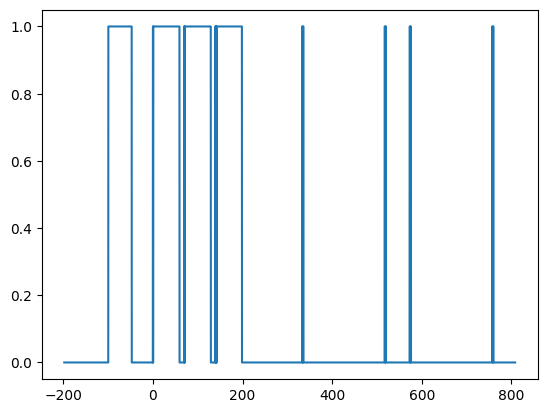

In [5]:
%matplotlib inline
plt.plot(multimodal_data.data['time'],multimodal_data.data['diode'])
plt.show()

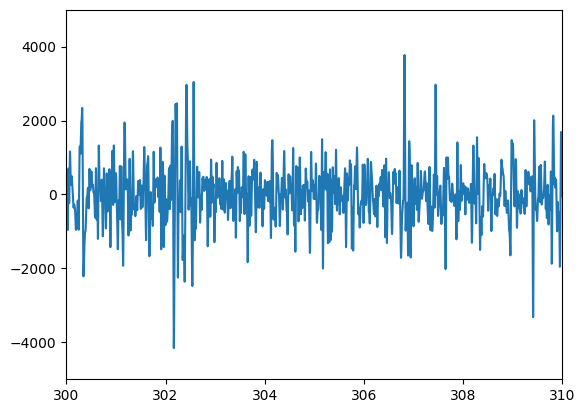

In [6]:
plt.plot(multimodal_data.data['time'],multimodal_data.data['EEG_cg_Fp1'])
plt.xlim(300, 310)
plt.ylim(-5000, 5000)
plt.show()

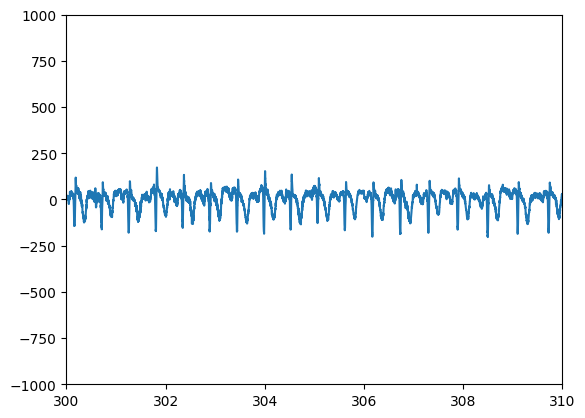

In [7]:
plt.plot(multimodal_data.data['time'],multimodal_data.data['ECG_cg'])
plt.xlim(300, 310)
plt.ylim(-1000, 1000)
plt.show()

In [8]:
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=False, load_et=True, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Setting default EEG sampling frequency to 1024 Hz used also in ET data.
ET time range: 273.25s to 493.04s
Events from ET annotations:
[None 'Brave' 'Peppa' 'Incredibles']
Reseting the ET time to the start of Brave
No EEG_events found, using ET_event data only.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00            59.55          
Peppa                          69.57           59.84          
Incredibles                    139.41          59.42          



In [9]:
multimodal_data.data.columns

Index(['time', 'time_idx', 'ET_event', 'ET_ch_x', 'ET_ch_y', 'ET_ch_pupil',
       'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil', 'ET_cg_blinks',
       'events'],
      dtype='str')

Event mapping: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3}


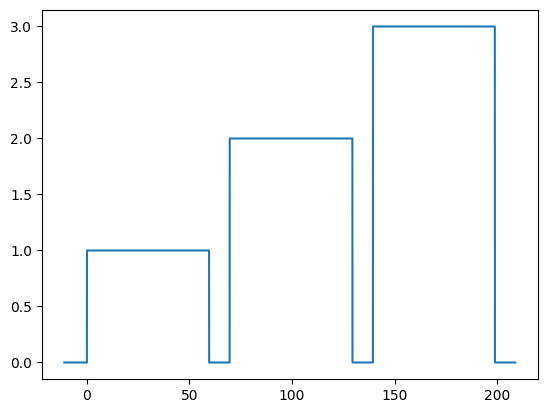

In [10]:
# Create a mapping from unique ET_event values to integers
event_mapping = {event: idx for idx, event in enumerate(multimodal_data.data['ET_event'].unique())}
print("Event mapping:", event_mapping)

# Map ET_event to integer values
multimodal_data.data['event_num'] = multimodal_data.data['ET_event'].map(event_mapping)

plt.plot(multimodal_data.data['time'],multimodal_data.data['event_num'])
plt.show()

In [11]:
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=True, load_et=True, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Detected events: [{'name': 'Brave', 'start': 197.640625, 'duration': 59.298828125}, {'name': 'Peppa', 'start': 267.189453125, 'duration': 59.5986328125}, {'name': 'Incredibles', 'start': 337.01953125, 'duration': 59.21484375}, {'name': 'Talk_1', 'start': 533.42578125, 'duration': 181.056640625}, {'name': 'Talk_2', 'start': 773.2294921875, 'duration': 181.056640625}]
Applying fir filters to EEG data.


/Users/admin/Library/CloudStorage/GoogleDrive-j.zygierewicz@uw.edu.pl/Mój dysk/SYNCIN_JZ/HYPERSCANNING_SIGNAL_ANALYSIS/hyperscanning-signal-analysis/.venv/lib/python3.12/site-packages/neurokit2/epochs/epochs_create.py:180: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  buffer.select_dtypes(exclude=["int", "int64"]).replace({0.0: np.n

Reseting the EEG time to the start of Brave
ET time range: 273.25s to 493.04s
Events from ET annotations:
[None 'Brave' 'Peppa' 'Incredibles']
Reseting the ET time to the start of Brave
Event Brave start times are consistent within 0.0 seconds.
Event Peppa differ in start times by: abs(0.0185546875) seconds.
Event Incredibles differ in start times by: abs(0.0322265625) seconds.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00            59.30          
Peppa                          69.55           59.60          
Incredibles                    139.38          59.21          
Talk_1                         335.79          181.06         
Talk_2                         575.59          181.06         



In [12]:
multimodal_data.data.columns

Index(['time_idx', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3',
       'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3',
       'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4', 'EEG_ch_M2',
       'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4', 'EEG_ch_T6',
       'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2', 'EEG_cg_F7',
       'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8', 'EEG_cg_M1',
       'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4', 'EEG_cg_T4',
       'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz', 'EEG_cg_P4',
       'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'EEG_events', 'diode', 'ECG_ch',
       'ECG_cg', 'IBI_ch', 'IBI_cg', 'ET_event', 'ET_ch_x', 'ET_ch_y',
       'ET_ch_pupil', 'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil',
       'ET_cg_blinks', 'time', 'events'],
      dtype='str')

Event mapping: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3}
Event mapping for events: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3, 'Talk_1': 4, 'Talk_2': 5}


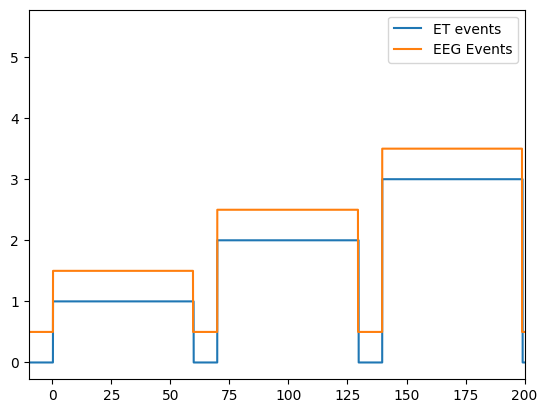

In [13]:

# Create a mapping from unique ET_event values to integers
event_mapping = {event: idx for idx, event in enumerate(multimodal_data.data['ET_event'].unique())}
print("Event mapping:", event_mapping)

# Map ET_event to integer values
multimodal_data.data['event_num_ET'] = multimodal_data.data['ET_event'].map(event_mapping)

# create a mapping from unique events values to integers
event_mapping_events = {event: idx for idx, event in enumerate(multimodal_data.data['events'].unique())}
print("Event mapping for events:", event_mapping_events)

multimodal_data.data['event_num_events'] = multimodal_data.data['events'].map(event_mapping_events)


plt.plot(multimodal_data.data['time_idx']/multimodal_data.fs, multimodal_data.data['event_num_ET'], label='ET events')
plt.plot(multimodal_data.data['time_idx']/multimodal_data.fs    ,multimodal_data.data['event_num_events']+0.5, label='EEG Events')
plt.legend()
plt.xlim(-10,200)
plt.show()

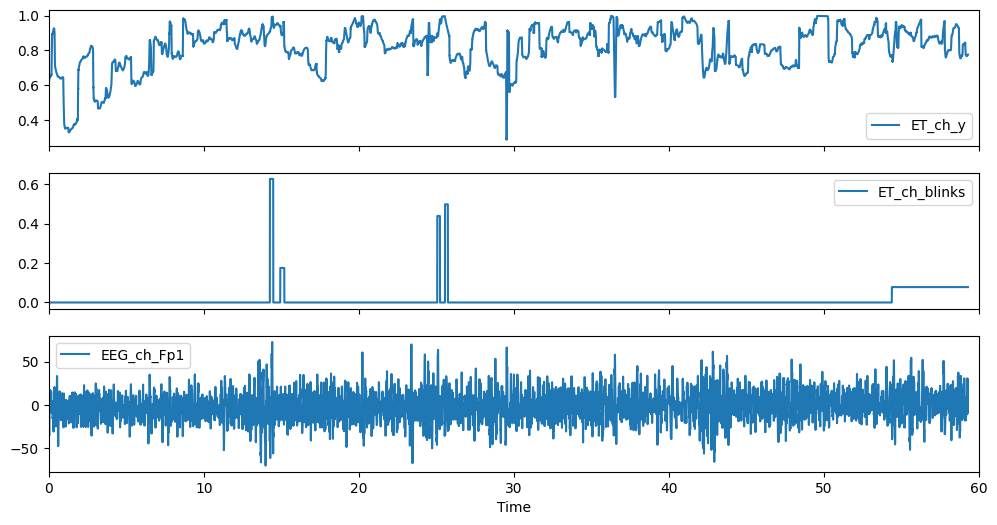

In [14]:
%matplotlib inline
data_selected = multimodal_data.data[(multimodal_data.data.events == 'Brave')]
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=3)
#ax[0].plot(data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_y')
ax[0].plot(data_selected['time'], data_selected['ET_ch_y'], linestyle='-', label='ET_ch_y')
ax[0].legend()

#ax[1].plot(data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
ax[1].plot(data_selected['time'], data_selected['ET_ch_blinks'], linestyle='-', label='ET_ch_blinks')
ax[1].legend()

#ax[2].plot(data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')
ax[2].plot(data_selected['time'], data_selected['EEG_ch_Fp1'], linestyle='-', label='EEG_ch_Fp1')
ax[2].legend()

plt.xlim(0,60)
plt.xlabel('Time')
plt.show()

{'Fp1': 0, 'Fp2': 1, 'F7': 2, 'F3': 3, 'Fz': 4, 'F4': 5, 'F8': 6, 'M1': 7, 'T3': 8, 'C3': 9, 'Cz': 10, 'C4': 11, 'T4': 12, 'M2': 13, 'T5': 14, 'P3': 15, 'Pz': 16, 'P4': 17, 'T6': 18, 'O1': 19, 'O2': 20, 'EKG1': 21, 'EKG2': 22, 'Audio': 23, 'Diode': 24, 'Fp1_cg': 25, 'Fp2_cg': 26, 'F7_cg': 27, 'F3_cg': 28, 'Fz_cg': 29, 'F4_cg': 30, 'F8_cg': 31, 'M1_cg': 32, 'T3_cg': 33, 'C3_cg': 34, 'Cz_cg': 35, 'C4_cg': 36, 'T4_cg': 37, 'M2_cg': 38, 'T5_cg': 39, 'P3_cg': 40, 'Pz_cg': 41, 'P4_cg': 42, 'T6_cg': 43, 'O1_cg': 44, 'O2_cg': 45, 'EKG1_cg': 46, 'EKG2_cg': 47}
DataFrame shape: (1029984, 62)
DataFrame columns: ['time_idx', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3']


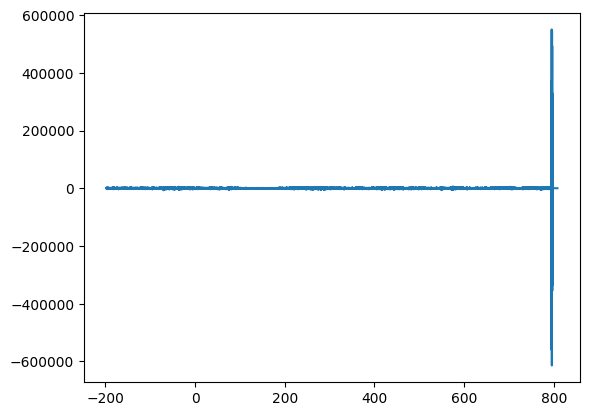

In [15]:
# plot EEG data from DataFrame
t = multimodal_data.data['time'].values
x = multimodal_data.data['EEG_cg_Fp1'].values
plt.plot(t, x)
print(multimodal_data.eeg_channel_mapping)
print('DataFrame shape:', multimodal_data.data.shape)
print('DataFrame columns:', list(multimodal_data.data.columns)[:10])